<a href="https://colab.research.google.com/github/sanjj271/Movie-recommendation-system-/blob/main/movie_recommendation_system_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings 

In [2]:
warnings.filterwarnings('ignore')

GET THE DATA TEST


In [151]:
df=pd.read_csv("/content/u.data",sep= '\t',names =columns_names)
columns_names=["user id" , "item_id", "rating", "timestamp"]
df.head()
#df.shape

,user id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [121]:
df['user id'].nunique()

943

In [123]:
df['item_id'].nunique()

1682

In [152]:
movie_titles=pd.read_csv("/content/u.item",sep= '\|',header= None)
movie_titles = movie_titles[[0,1]]
movie_titles.columns=['item_id','name']
movie_titles.head()

,item_id,name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
movie_titles['item_id']

In [155]:
new_set= pd.merge(df,movie_titles ,on ='item_id')
new_set.tail()

,user id,item_id,rating,timestamp,name
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


#Exploratory Data Analysis

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')


In [ ]:
new_set

In [ ]:
new_set.groupby('name').mean()['rating'].sort_values(ascending = False)

In [ ]:
new_set.groupby('name').count()['rating'].sort_values(ascending = False)

In [ ]:
ratings = pd.DataFrame(new_set.groupby('name').mean()['rating'])
ratings

In [ ]:
ratings['Number of ratings']=pd.DataFrame(new_set.groupby('name').count()['rating'])
ratings

In [ ]:
ratings.sort_values(by = 'rating',ascending=False)



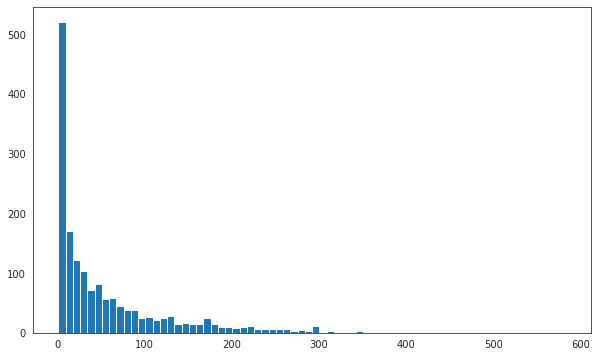

In [199]:
plt.figure(figsize=(10,6))
plt.hist(ratings['Number of ratings'],bins=70)
plt.show()

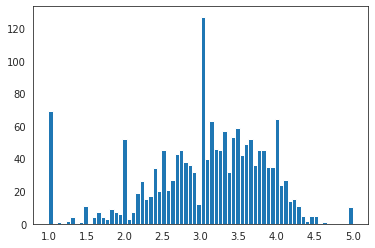

In [200]:
plt.hist(ratings['rating'],bins=70)
plt.show()

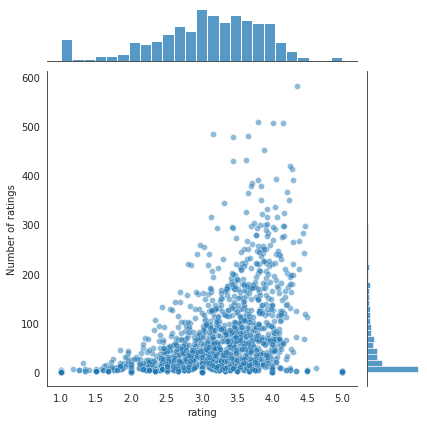

In [203]:
sns.jointplot(x='rating', y= 'Number of ratings',data=ratings,alpha=0.5)

MOVIE RECOMMENDATION SYSTEM


In [210]:
moviemat= new_set.pivot_table(index ='user id', columns = 'name',values='rating')



In [217]:
moviemat

name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
wizarofoz_ratings= moviemat['Wizard of Oz, The (1939)']
wizarofoz_ratings



In [ ]:
similar_to_wizardofoz=moviemat.corrwith(wizarofoz_ratings)
similar_to_wizardofoz

In [227]:
corr_wizardofoz=pd.DataFrame(similar_to_wizardofoz , columns=['Correlation'])
corr_wizardofoz.dropna(inplace=True)
corr_wizardofoz.head()

,Correlation
name,
'Til There Was You (1997),-0.132453
1-900 (1994),-1.000000
101 Dalmatians (1996),0.366592
12 Angry Men (1957),0.165508
187 (1997),0.741480


In [ ]:
corr_wizardofoz.sort_values('Correlation', ascending=False)


In [237]:
corr_wizard=corr_wizardofoz.join(ratings['Number of ratings'])
corr_wizard

,Correlation,Number of ratings
name,,
'Til There Was You (1997),-0.132453,9
1-900 (1994),-1.000000,5
101 Dalmatians (1996),0.366592,109
12 Angry Men (1957),0.165508,125
187 (1997),0.741480,41
...,...,...
Young Guns (1988),0.199910,101
Young Guns II (1990),0.173557,44
"Young Poisoner's Handbook, The (1995)",0.558581,41


In [241]:
corr_wizard[corr_wizard['Number of ratings']>100].sort_values(by="Correlation",ascending = False)

,Correlation,Number of ratings
name,,
"Wizard of Oz, The (1939)",1.000000,246
James and the Giant Peach (1996),0.519491,126
"African Queen, The (1951)",0.508389,152
On Golden Pond (1981),0.476409,106
Miracle on 34th Street (1994),0.451014,101
...,...,...
Con Air (1997),-0.167526,137
Down Periscope (1996),-0.183201,101
George of the Jungle (1997),-0.228105,162


PREDICT FUNCTION


In [252]:
def predictmovie(name):
  movie_ratings= moviemat[name]
  similar_to_movie=moviemat.corrwith(movie_ratings)
  corr_movie=pd.DataFrame(similar_to_movie , columns=['Correlation'])
  corr_movie.dropna(inplace=True)
  corr_movie=corr_movie.join(ratings['Number of ratings'])
  predictions = corr_movie[corr_movie['Number of ratings']>100].sort_values(by="Correlation",ascending = False)
  return predictions

 


In [256]:
predictions = predictmovie("Titanic (1997)")
predictions

,Correlation,Number of ratings
name,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
...,...,...
Raging Bull (1980),-0.223660,116
Jackie Brown (1997),-0.236841,126
Brazil (1985),-0.243532,208
